# vim-emu evaluation

Based on SONATA D5.4, generates inputs for D6.3.

* startup / setup times
* memory consuption



In [130]:
# global settings
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.interpolate import griddata
import numpy as np
import seaborn as sns
import pandas as pd

In [131]:
sns.set_style("darkgrid")
sns.set_context({"figure.figsize": (10, 5)})

## Scaling Experiment

Start emulator platform with diffrent number of PoPs for `line`, `star`, and `mesh` topology.

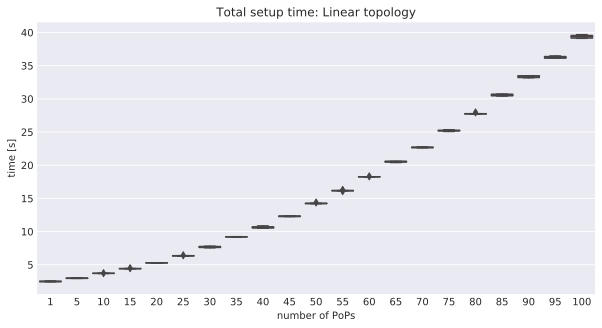

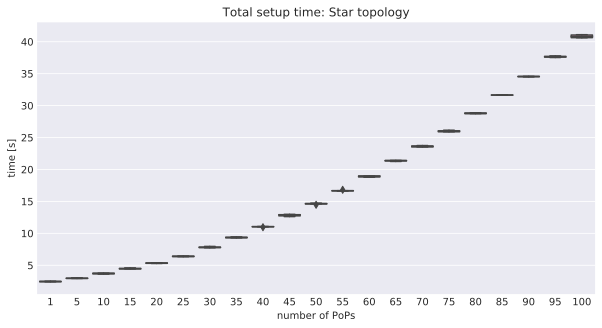

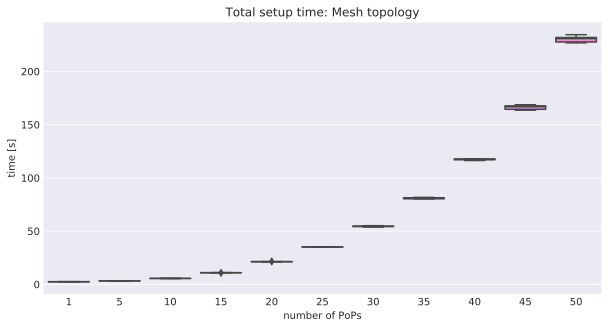

In [132]:
# read results
df = pd.read_pickle("data/2017-12-05-scaling_experiment.pkl")
#print(df)
df_line = df[df["topology"] == "line"]
df_star = df[df["topology"] == "star"]
df_mesh = df[df["topology"] == "mesh"]

#df_line = df_line.groupby(["n_pops"]).mean()
#print(df_line)

def box_plot(d, x="n_pops", y="time_total", title="title", path="plots/boxplot.png"):
    plt.figure()
    ax = sns.boxplot(data=d, x="n_pops", y="time_total")
    ax.set_title(title)
    ax.set_xlabel("number of PoPs")
    ax.set_ylabel("time [s]")
    fig = ax.get_figure()
    fig.savefig(path, dpi=300)
    
box_plot(df_line, title="Total setup time: Linear topology", path="plots/boxplot_total_line.png")
box_plot(df_star, title="Total setup time: Star topology", path="plots/boxplot_total_star.png")
box_plot(df_mesh, title="Total setup time: Mesh topology", path="plots/boxplot_total_mesh.png")



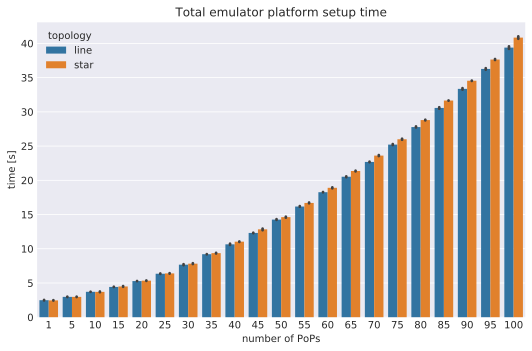

In [133]:
dff = df[df["topology"] != "mesh"]
ax = sns.factorplot(x='n_pops',
                    y='time_total',
                    hue='topology',
                    data=dff,
                    kind="bar",
                    legend_out=False,
                    size=5.0,
                    aspect=1.5)
ax.set_xlabels("number of PoPs")
ax.set_ylabels("time [s]")
plt.title("Total emulator platform setup time")
plt.tight_layout()
ax.savefig("plots/startup_compare_line_star.png", dpi=300)

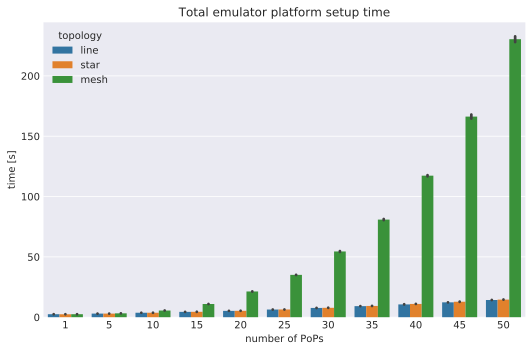

In [134]:
dff = df[df["n_pops"] < 51]
ax = sns.factorplot(x='n_pops',
                    y='time_total',
                    hue='topology',
                    data=dff,
                    kind="bar",
                    legend_out=False,
                    size=5.0,
                    aspect=1.5)
ax.set_xlabels("number of PoPs")
ax.set_ylabels("time [s]")
plt.title("Total emulator platform setup time")
plt.tight_layout()
ax.savefig("plots/startup_compare_mesh.png", dpi=300)

## TODO

- ~~Total setuptime (line, star mesh)~~
- Memory usage
- Setup time breakdown
- Total setuptime TopologyZoo
